In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [77]:
# Goal of the project 

# input an image from the test set
# The model will output predicted labels (e.g., [1, 8, 19]).
# These labels will then be mapped to a caption using:
 #- A pre-defined lookup table for captions associated with labels.
 #- or a text generation model 

# train = '/kaggle/input/multi-label-classification-competition-2024/COMP5329S1A2Dataset/train.csv'
# test = '/kaggle/input/multi-label-classification-competition-2024/COMP5329S1A2Dataset/test.csv'
# image_dir = '/kaggle/input/multi-label-classification-competition-2024/COMP5329S1A2Dataset/data'




In [78]:
import pandas as pd
import re
from io import StringIO


train = '/kaggle/input/multi-label-classification-competition-2024/COMP5329S1A2Dataset/train.csv'
test = '/kaggle/input/multi-label-classification-competition-2024/COMP5329S1A2Dataset/test.csv'
image_dir = '/kaggle/input/multi-label-classification-competition-2024/COMP5329S1A2Dataset/data'

# this function will read CSV files and fix any formatting issues
def read_csv_with_image_paths(file_path, image_dir):
    with open(file_path) as file:
        
        lines = [re.sub(r'([^,])"(\s*[^\n])', r'\1/"\2', line) for line in file]
    
    df = pd.read_csv(StringIO(''.join(lines)), escapechar="/")
    df["image_path"] = image_dir + "/" + df["ImageID"]
    return df


train_df = read_csv_with_image_paths(train, image_dir)
test_df = read_csv_with_image_paths(test, image_dir)


In [79]:
train_df.head(20)

,ImageID,Labels,Caption,image_path
0,0.jpg,1,Woman in swim suit holding parasol on sunny day.,/kaggle/input/multi-label-classification-compe...
1,1.jpg,1 19,A couple of men riding horses on top of a gree...,/kaggle/input/multi-label-classification-compe...
2,2.jpg,1,They are brave for riding in the jungle on tho...,/kaggle/input/multi-label-classification-compe...
3,3.jpg,8 3 13,a black and silver clock tower at an intersect...,/kaggle/input/multi-label-classification-compe...
4,4.jpg,8 3 7,A train coming to a stop on the tracks out side.,/kaggle/input/multi-label-classification-compe...
5,5.jpg,1,A young man riding a skateboard into the air.,/kaggle/input/multi-label-classification-compe...
6,6.jpg,5,A big airplane flying in the big blue sky,/kaggle/input/multi-label-classification-compe...
7,7.jpg,1 4,A man riding a motor bike across a forest.,/kaggle/input/multi-label-classification-compe...
8,8.jpg,8 3,There is a street lined with packed buildings,/kaggle/input/multi-label-classification-compe...
9,9.jpg,1 18 15,A skate park next to a body of water and green...,/kaggle/input/multi-label-classification-compe...


In [80]:
test_df.head()

,ImageID,Caption,image_path
0,30000.jpg,A little girl waring a krispy kreme hat holdin...,/kaggle/input/multi-label-classification-compe...
1,30001.jpg,A beautiful young woman holding an orange fris...,/kaggle/input/multi-label-classification-compe...
2,30002.jpg,A group of people sitting on couch next to a c...,/kaggle/input/multi-label-classification-compe...
3,30003.jpg,A person on a snowboard rides on the hill.,/kaggle/input/multi-label-classification-compe...
4,30004.jpg,A man riding a skateboard with a helmet on in ...,/kaggle/input/multi-label-classification-compe...


In [81]:
# so what this will do is:
# Extract unique labels from the dataset and create mappings:
# - `id2label`: Maps numeric IDs to label names (e.g., 0 -> "1").
# - `label2id`: Maps label names to numeric IDs (e.g., "1" -> 0).
# This helps convert labels into a format the model can understand and also allows converting predictions back to original labels.

# so they are appearing randonly in the set like it didnt start from '1', started from '5'. that is because Python’s set (labels) doesn't guarentee the order of the items

labels = set()
for label in train_df.Labels.values:
    for l in label.split():
        labels.add(l.strip())



id_to_label = {i:v for i,v in enumerate(list(labels))}
label_to_id = {v:k for k,v in id2label.items()}
print("label_to_id:", label_to_id)
print("id_to_label:", id_to_label)
print("Labels set:", labels)# help us see how they were added in to the set. that is why '5' is mapped to 0 since it was added first 

label_to_id: {'5': 0, '9': 1, '16': 2, '4': 3, '15': 4, '13': 5, '10': 6, '17': 7, '3': 8, '6': 9, '14': 10, '7': 11, '1': 12, '2': 13, '11': 14, '18': 15, '8': 16, '19': 17}
id_to_label: {0: '5', 1: '9', 2: '16', 3: '4', 4: '15', 5: '13', 6: '10', 7: '17', 8: '3', 9: '6', 10: '14', 11: '7', 12: '1', 13: '2', 14: '11', 15: '18', 16: '8', 17: '19'}
Labels set: {'5', '9', '16', '4', '15', '13', '10', '17', '3', '6', '14', '7', '1', '2', '11', '18', '8', '19'}


In [82]:
# Now lets split the training set into train and validation sets 
from sklearn.model_selection import train_test_split

# so what this block is going to do:
# Splits the data into:
# train_df: 90% of the data for training.
# val_df: 10% of the data for validation.


train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42)#random_state=42 ensures the same split every time.

# Reset the index for both train and validation dataframes
# Resets indices of both train_df and val_df to start from 0.
# Removes gaps in indices caused by splitting.
# Why: 
# Original train_df might have indices [0, 1, 2, ..., 9999].
# After splitting, train_df might have indices [0, 1, 3, 4, 5, ..., 8999] (basically missing some indices due to the split).
# val_df might have indices like [2, 10, 15, ...].
# reset_index(drop=True) resets these indices to start from 0 for both train_df and val_df.

train_df, val_df = train_df.reset_index(drop=True), val_df.reset_index(drop=True)

print("Train:", train_df.shape)        
print("Validation:", val_df.shape)     
print("Test:", test_df.shape)          


Train: (26996, 4)
Validation: (3000, 4)
Test: (10000, 3)


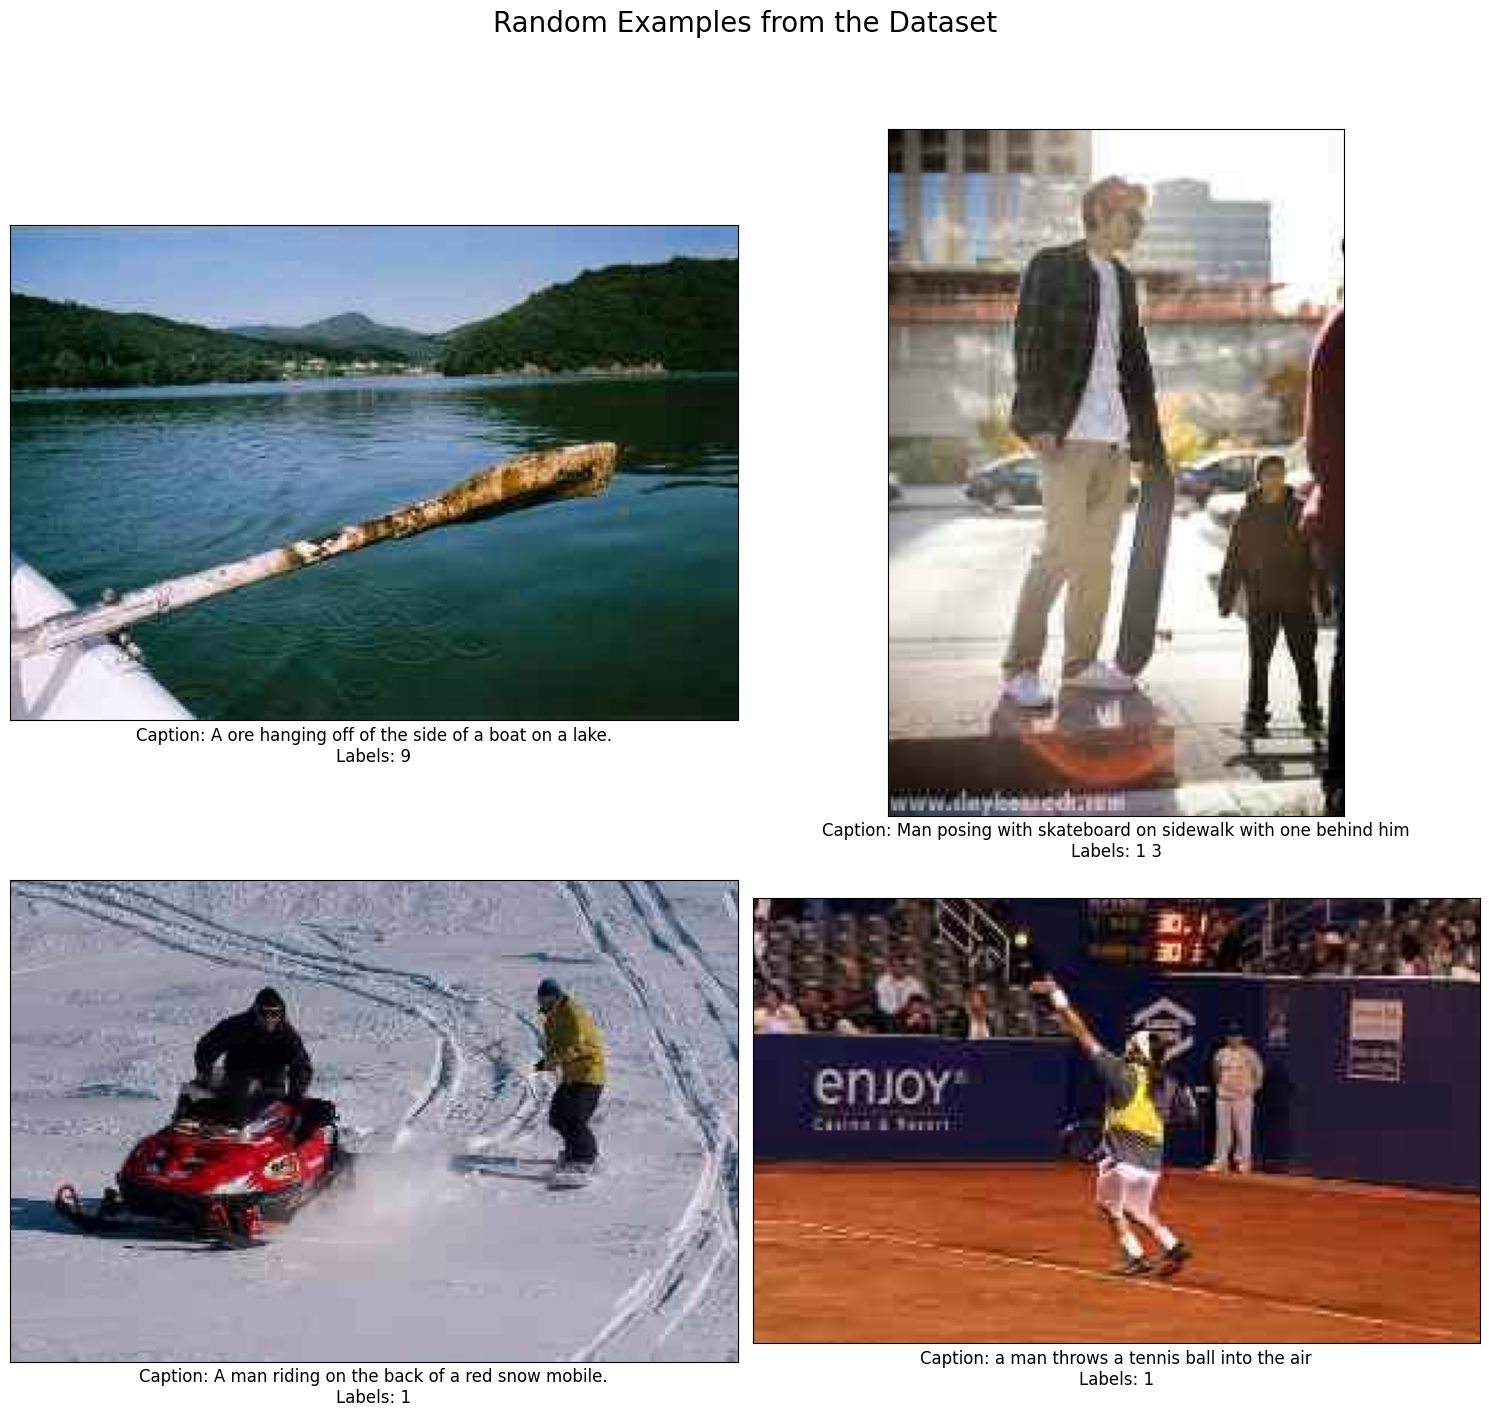

In [83]:
# Let's check some of the images, their labels and the captions from our training dataset

import cv2
import matplotlib.pyplot as plt
import random
from random import randint

# Set random seed for reproducibility 
#if we're randomly selecting images or splitting datasets, using the same seed ensures we'll get the same results every time.
random.seed(12) # so this is better than randomly generating like this (random.randint(0, 10)) which will generate different results every time

def display_examples(train_df, num_images=4):
    """
    Display a few random examples from the training dataset with captions and labels.
    
    Args:
        train_df (DataFrame): The training dataset with columns ['image_path', 'Caption', 'Labels'].
        num_images (int): Number of random images to display.
    """
    
    fig = plt.figure(figsize=(15, 15))
    fig.suptitle("Random Examples from the Dataset", fontsize=20)

   
    for i, idx in enumerate(random.sample(range(len(train_df)), num_images)):
        # Subplot setup
        plt.subplot(2, 2, i + 1)
        plt.xticks([])  
        plt.yticks([])  
        plt.grid(False)  
        
       
        img_path = train_df.iloc[idx]["image_path"]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

       
        plt.imshow(image)
        
        
        caption = train_df.iloc[idx]["Caption"]
        labels = train_df.iloc[idx]["Labels"]
        plt.xlabel(f"Caption: {caption}\nLabels: {labels}", fontsize=12, wrap=True)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  
    plt.show()


display_examples(train_df)


In [91]:
from transformers import AutoTokenizer
from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image
import torch

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

#Image transformation/ processing 
transform = transforms.Compose([
    transforms.Resize((256, 256)),           
    transforms.CenterCrop(224),             
    transforms.ToTensor(),                 
    transforms.Normalize(                   
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225]
    ),
])

# TODO and info:
#this block of code is to prepare data for multi-label image classification by processing images, captions, and labels
# It takes a DataFrame (df) containing image paths, captions, and labels. 
#If max_samples is specified, it randomly selects that many rows (e.g., if max_samples=3, it picks 3 random rows like 2.jpg, 5.jpg, and 3.jpg) 
#and resets the index for easy access. 
#For each data sample, it loads the image from the given path, applies transformations , and tokenizes the caption using a tokenizer. 
 #If the dataset is for training or validation (not testing), it also converts the labels into a binary vector.

#At last, it returns a dictionary containing the processed image,tokenized caption, and binary labels. 
# So now, after this data is ready to be fed into a multi-modal model for training or evaluation.



class MultiLabelDataset(Dataset):
    def __init__(self, 
                 df, 
                 tokenizer=None, 
                 transform=None,
                 max_length=64, 
                 max_samples=None,
                 is_test=False):
        """
       dataset for multi-label image classification.

        Args:
            df (DataFrame): DataFrame containing image paths, captions, and labels.
            tokenizer (Tokenizer): Tokenizer to process captions  we will be testing a few ones: Hugging face, Autotokenizer .. 
            transform (callable, opt): Image transformations 
            max_length: Maximum length for tokenized captions.
            max_samples (int, opt): Number of samples to use (for debugging or faster training).
            is_test (bool): Whether the dataset is for testing (no labels) or for taining.
        """
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.transform = transform
        self.max_length = max_length
        self.is_test = is_test


        # Randomly selects 3 rows if suppose we specify as 3 to max_samples (2.jpg, 5.jpg, and 3.jpg) from the original DataFrame.
        # Resets the index so the new DataFrame starts with 0, 1, 2. and then displays with image and captions 
        # ImageID    Caption
        # 0   2.jpg  Caption 2
        # 1   5.jpg  Caption 5
        # 2   3.jpg  Caption 3
        
        if max_samples is not None:
            self.df = self.df.sample(n=max_samples, random_state=42).reset_index(drop=True)

    def __len__(self):
        """
        Returns the size of the dataset.
        """
        return len(self.df)

    def __getitem__(self, index):
        """
        Fetches a single data sample.

        Returns:
            dict: A dictionary containing the image tensor, tokenized caption, and labels (if not test).
        """
        # get the caption and image path
        caption = self.df.loc[index, "Caption"]
        image_path = self.df.loc[index, "image_path"]

        # Load and process the image
        try:
            image = Image.open(image_path).convert('RGB')
        except FileNotFoundError:
            raise ValueError(f"Image not found at path: {image_path}")
        
        if self.transform is not None:
            image = self.transform(image)
        
        # Process the caption using the tokenizer
        # Models, especially in NLP, cannot 
        # directly process raw text like "A man riding a horse.". 
        # Instead, they require numerical inputs. The tokenizer is the first step in this process. changes into ['A', 'man', 'riding'] like that 
        
        if self.tokenizer is not None:
            model_inputs = self.tokenizer(
                caption, 
                max_length=self.max_length, 
                padding="max_length", 
                truncation=True,
                return_tensors="pt"
            )
            # Remove batch dimension from tokenizer output
            model_inputs = {k: v.squeeze(0) for k, v in model_inputs.items()}
        else:
            model_inputs = {}

        # Process labels (for training/validation data only)
        if not self.is_test:
            labels = self.df.loc[index, "Labels"]
            labels = [l.strip() for l in labels.split()]
            labels = [int(k in labels) for k, v in label2id.items()]
            model_inputs["labels"] = torch.tensor(labels, dtype=torch.float)

        # Add the processed image to the output dictionary
        model_inputs["image"] = image
        return model_inputs


/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [97]:
# initialize the dataset that we have above 
train_dataset = MultiLabelDataset(
    df=train_df,             
    tokenizer=tokenizer,     
    transform=transform      # image transformation that we have done above 
)

#Testing 
sample = train_dataset[0]  
print("Processed Image Shape:", sample["image"].shape)  # Should be (3, 224, 224)
print("Tokenized Caption (input_ids):", sample["input_ids"]) 
print("Attention Mask:", sample["attention_mask"]) 
print("Binary Label Vector:", sample.get("labels"))#position 12 is the label 1. we can sscroll up and see it.  



# 101: The [CLS] token (used to indicate the start of the input).
# 102: The [SEP] token (used to separate segments or mark the end of the input).
# Words and Subwords:

# Each number corresponds to a specific word or subword from the caption:
# 2450: Represents the word "Woman".suppose
# 1999: Represents the word "in".
# 9880: Represents "swim".
# And so on...


# The attention mask tells the model which parts of the input are real tokens and which parts are padding. real is 1, 0 is padding 


Processed Image Shape: torch.Size([3, 224, 224])
Tokenized Caption (input_ids): tensor([  101,  1037, 11851,  9370,  2007, 15220,  1997,  2367,  7957,  1997,
         2833,  1012,   102,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])
Attention Mask: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Binary Label Vector: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])


In [98]:
max_samples = 3
dataset = MultiLabelDataset(df=train_df, max_samples=max_samples, is_test=False)
print("Sampled DataFrame:")
print(dataset.df)
print("Number of Samples:", len(dataset))

Sampled DataFrame:
    ImageID Labels                                            Caption  \
0   276.jpg      1  A woman sitting at a desk rubbing her hands to...   
1  5668.jpg    9 1  A black and white photo of multiple sail boats...   
2  8132.jpg      1    A man standing over a plate of food on a table.   

                                          image_path  
0  /kaggle/input/multi-label-classification-compe...  
1  /kaggle/input/multi-label-classification-compe...  
2  /kaggle/input/multi-label-classification-compe...  
Number of Samples: 3


In [102]:

from transformers import PretrainedConfig, AutoConfig

#TODO and notes 
# This block has  a Config class to organize all the settings needed for our  model that processes both text and images. 
# It uses a text model (bert-base-uncased) for handling captions and a CNN model (efficientnet-b5) for processing images. 
# The class stores the number of labels , we have 18, mappings between 
# labels and IDs (label_to_id and id_to_label), and settings like dropout (to avoid overfitting), 
#It also pulls settings from the pre-trained BERT model using AutoConfig, which automatically loads details like the size of the vocabulary
#(the number of words BERT can recognize), 
# and the ID for the end-of-sequence token (used to mark the end of a sentence). 
# Basically, Config class makes it easier to build, fine-tune, and test the model. 
# The display_config function lets us to quickly check all the settings, which is useful for debugging or tracking experiments. 

class Config(PretrainedConfig):
    def __init__(
        self,
        model_type: str = "bert",                       
        lm_model: str = "bert-base-uncased",            # this is pre-trained language model (Hugging Face BERT)
        cnn_model: str = "efficientnet-b5",            # Pre-trained CNN backbone for images 
        num_labels: int = 18,                          # Number of output labels for multi-label classification
        label2id: dict = None,                         
        id2label: dict = None,                         # Mapping from ID to label name
        problem_type: str = "multi_label_classification", 
        dropout: float = 0.1,                          
        inner_dim: int = 1024,                         
        max_length: int = 64,                         
        **kwargs                                       
    ):
       
        super(Config, self).__init__(
            num_labels=num_labels, 
            problem_type=problem_type, 
            **kwargs
        )
        
        
        self.model_type = model_type
        self.lm_model = lm_model
        self.cnn_model = cnn_model
        self.label2id = label2id
        self.id2label = id2label
        self.dropout = dropout
        self.inner_dim = inner_dim
        self.max_length = max_length

       
        encoder_config = AutoConfig.from_pretrained(self.lm_model)
        self.vocab_size = encoder_config.vocab_size        # Vocabulary size for the tokenizer
        self.eos_token_id = encoder_config.eos_token_id    

       
        self.hidden_size = encoder_config.hidden_size      
        self.num_attention_heads = getattr(encoder_config, 'num_attention_heads', None)

    def display_config(self):
        print("Configuration Settings:")
        for key, value in vars(self).items():
            print(f"{key}: {value}")
   


Configuration Settings:
__module__: transformers.configuration_utils
__annotations__: {'model_type': <class 'str'>, 'is_composition': <class 'bool'>, 'attribute_map': typing.Dict[str, str], '_auto_class': typing.Optional[str]}
__doc__: 
    Base class for all configuration classes. Handles a few parameters common to all models' configurations as well as
    methods for loading/downloading/saving configurations.

    <Tip>

    A configuration file can be loaded and saved to disk. Loading the configuration file and using this file to
    initialize a model does **not** load the model weights. It only affects the model's configuration.

    </Tip>

    Class attributes (overridden by derived classes):

    - **model_type** (`str`) -- An identifier for the model type, serialized into the JSON file, and used to recreate
      the correct object in [`~transformers.AutoConfig`].
    - **is_composition** (`bool`) -- Whether the config class is composed of multiple sub-configs. In this case th